In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('train.csv',usecols = ['Age','Fare','Survived'])

In [5]:
df.head(3)

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250


In [6]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [7]:
df.isnull().mean()*100

Survived     0.00000
Age         19.86532
Fare         0.00000
dtype: float64

In [8]:
x = df.drop('Survived',axis = 1)
y = df['Survived']

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [10]:
x_train['Age_imputed'] = x_train['Age']
x_test['Age_imputed'] = x_test['Age']

In [16]:
x_test.head()

,Age,Fare,Age_imputed
709,NaN,15.2458,NaN
439,31.0,10.5000,31.0
840,20.0,7.9250,20.0
720,6.0,33.0000,6.0
39,14.0,11.2417,14.0


In [17]:
x_train['Age_imputed'][x_train['Age_imputed'].isnull()] = x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

x_test['Age_imputed'][x_test['Age_imputed'].isnull()] = x_test['Age'].dropna().sample(x_test['Age'].isnull().sum()).values

In [22]:
x_train.head(10)

,Age,Fare,Age_imputed
331,45.5,28.5000,45.5
733,23.0,13.0000,23.0
382,32.0,7.9250,32.0
704,26.0,7.8542,26.0
813,6.0,31.2750,6.0
118,24.0,247.5208,24.0
536,45.0,26.5500,45.0
361,29.0,27.7208,29.0
29,NaN,7.8958,50.0
55,NaN,35.5000,30.0


C:\Users\USER\AppData\Local\Temp\ipykernel_7160\3412159478.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
C:\Users\USER\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\USER\AppData\Local\Temp\ipykernel_7160\3412159478.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displ

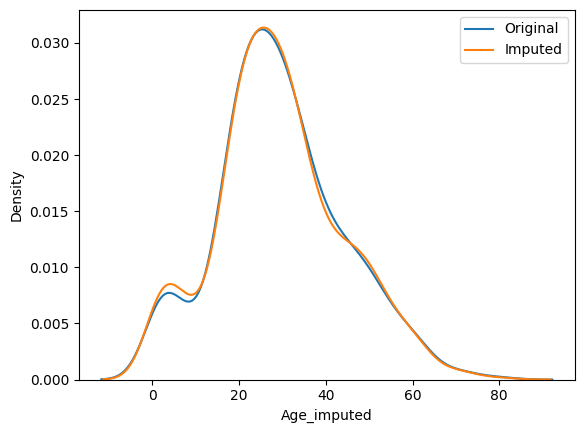

In [26]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_imputed'],label='Imputed',hist=False)

plt.legend()
plt.show()

<Axes: >

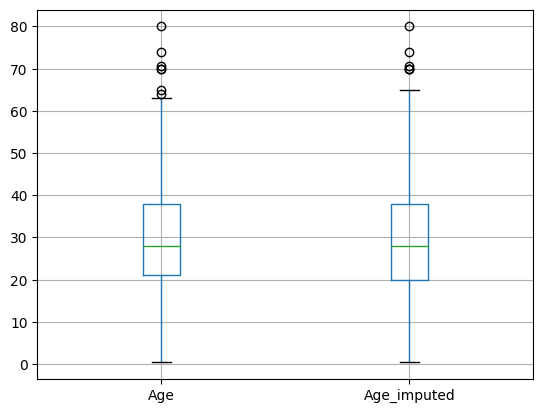

In [29]:
x_train[['Age','Age_imputed']].boxplot()